In [1]:
#importing the required libraries
import pandas as pd
import numpy as np
from datetime import datetime,date
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
#importing the dataset
df = pd.read_csv("C:/Users/MK064837/Google Drive/Simplilearn/DataSets/Walmart_Store_sales.csv")
df.head(10)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806,0,46.50,2.625,211.350143,8.106
5,1,12-03-2010,1439541,0,57.79,2.667,211.380643,8.106
6,1,19-03-2010,1472515,0,54.58,2.720,211.215635,8.106
7,1,26-03-2010,1404429,0,51.45,2.732,211.018042,8.106
8,1,02-04-2010,1594968,0,62.27,2.719,210.820450,7.808
9,1,09-04-2010,1545418,0,65.86,2.770,210.622857,7.808


In [3]:
#Finding the Store with maximum sales(overall)
df1 = df.groupby(by=['Store']).sum()
df1.loc[df1['Weekly_Sales']==df1['Weekly_Sales'].max()]

,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Store,,,,,,
20,301397719,10,7929.55,488.718,29892.45268,1054.112


### Conclusion
- Store no 20 has the overall maximum sales

In [4]:
#Finding the Store with maximum sales(weekly)
print("Store with maximum sales in a week")
df.loc[df['Weekly_Sales']==df['Weekly_Sales'].max()]

Store with maximum sales in a week


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
1905,14,24-12-2010,3818686,0,30.59,3.141,182.54459,8.724


In [5]:
# Evaluating STD, mean an Coefficient of mean to std and evaluating findings.
df2 = pd.DataFrame(df.groupby('Store').agg({'Weekly_Sales':['std','mean']}))
df2['Coeff_Mean_Std'] = (df2[('Weekly_Sales','std')]/df2[('Weekly_Sales','mean')])*100
print("The highest standard deviation among the stores is :")
df2.loc[df2[('Weekly_Sales','std')]==df2[('Weekly_Sales','std')].max()]

The highest standard deviation among the stores is :


Weekly_Sales               Coeff_Mean_Std
                 std          mean               
Store                                            
14     317569.927617  2.020978e+06      15.713676

In [6]:
#Converting Date field to date format, defining timeframe for q2 and q3 and extracting quaterly data
df['Date'] = pd.to_datetime(df['Date'])
q3_from = pd.Timestamp(date(2012,7,1))
q3_to = pd.Timestamp(date(2012,9,30))
q2_from =pd.Timestamp(date(2012,4,1))
q2_to =pd.Timestamp(date(2012,6,30))
q3 = df[(df['Date']>q3_from)&(df['Date']<q3_to)]
q2 = df[(df['Date']>q2_from)&(df['Date']<q2_to)]

In [7]:
#Grouping the quaterly data by Store and evaluating Growth Rate
q2 = q2.groupby(by=['Store']).sum()
q3 = q3.groupby(by=['Store']).sum()
Q = q2.merge(q3, how='inner', on=['Store'])
Q['Growth_Rate'] = ((Q['Weekly_Sales_y']-Q['Weekly_Sales_x'])/Q['Weekly_Sales_x'])
print("Store with highest growth rate is : ")
Q.loc[Q['Growth_Rate']==Q['Growth_Rate'].max()]

Store with highest growth rate is : 


,Weekly_Sales_x,Holiday_Flag_x,Temperature_x,Fuel_Price_x,CPI_x,Unemployment_x,Weekly_Sales_y,Holiday_Flag_y,Temperature_y,Fuel_Price_y,CPI_y,Unemployment_y,Growth_Rate
Store,,,,,,,,,,,,,
16,6626128,0,724.02,48.833,2569.932602,79.76,6441305,1,713.67,43.263,2375.871337,72.941,-0.027893


#### Conclusion
- Although all the stores have negative growth rate but tore 16 (-0.027893) has comparitively less loss in growth rate with respect to other stores

In [8]:
#Creating flags for Holidays
df['Superbowl'] = np.where((df['Date']=="2010-02-12")|(df['Date']=="2011-02-11")|(df['Date']=="2012-02-10")|(df['Date']=="2013-02-08"),1,0)
df['LabourDay'] = np.where((df['Date']=="2010-09-10")|(df['Date']=="2011-09-09")|(df['Date']=="2012-09-07")|(df['Date']=="2013-09-06"),1,0)
df['Thanksgiving'] = np.where((df['Date']=="2010-11-26")|(df['Date']=="2011-11-25")|(df['Date']=="2012-11-23")|(df['Date']=="2013-11-29"),1,0)
df['Christmas'] = np.where((df['Date']=="2010-12-31")|(df['Date']=="2011-12-30")|(df['Date']=="2012-12-28")|(df['Date']=="2013-12-27"),1,0)

In [37]:
#Mean sales on holiday and non holiday
print("Mean sales of Holidays and non Holidays week")
round(df.groupby(by=['Holiday_Flag']).mean())

Mean sales of Holidays and non Holidays week


,Store,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,Superbowl,LabourDay,Thanksgiving,Christmas
Holiday_Flag,,,,,,,,,,
0,23.0,1041256.0,61.0,3.0,172.0,8.0,0.0,0.0,0.0,0.0
1,23.0,1122887.0,50.0,3.0,171.0,8.0,0.0,0.0,0.0,0.0


In [38]:
#Mean sales on superbowl holiday
print("Mean sales of Holidays and non Holidays week")
round(df.groupby(by=['Superbowl']).mean())

Mean sales of Holidays and non Holidays week


,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,LabourDay,Thanksgiving,Christmas
Superbowl,,,,,,,,,,
0,23.0,1046964.0,0.0,61.0,3.0,172.0,8.0,0.0,0.0,0.0


In [41]:
#Mean sales on Labourday holiday
round(df.groupby(by=['LabourDay']).mean())

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Superbowl,Thanksgiving,Christmas
LabourDay,,,,,,,,,,
0,23.0,1047019.0,0.0,61.0,3.0,172.0,8.0,0.0,0.0,0.0
1,23.0,1039182.0,1.0,73.0,4.0,172.0,8.0,0.0,0.0,0.0


In [11]:
#Mean sales on Thanksgiving holiday
round(df.groupby(by=['Thanksgiving']).mean())

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Superbowl,LabourDay,Christmas
Thanksgiving,,,,,,,,,,
0,23.0,1040946.0,0.0,61.0,3.0,172.0,8.0,0.0,0.0,0.0
1,23.0,1471273.0,1.0,49.0,3.0,171.0,8.0,0.0,0.0,0.0


In [43]:
#Mean sales on Christmas holiday
round(df.groupby(by=['Christmas']).mean())

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Superbowl,LabourDay,Thanksgiving
Christmas,,,,,,,,,,
0,23.0,1048186.0,0.0,61.0,3.0,172.0,8.0,0.0,0.0,0.0
1,23.0,960833.0,1.0,37.0,3.0,171.0,8.0,0.0,0.0,0.0


#### Conclusion
- From above mean sales value we can see that:
 - Superbowl holidays have no sales.
 - Labour days sales have a match with the non holiday season mean sales.
 - Thanksgiving has much higher sales wrt non holiday season mean sales.
 - Christmas holidays incures a loss wrt to mean sales

#### Note
- As the mean sale of Non holiday season is 1041256 and holiday season is 1122887
- We shall try to find out sales on holidays which are greater than 1041256 i.e the average mean sale on Non holiday season

In [39]:
df[(df['Weekly_Sales']>1041256)&df['Holiday_Flag']==1] 

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Superbowl,LabourDay,Thanksgiving,Christmas
1,1,2010-12-02,1641957,1,38.51,2.548,211.242170,8.106,0,0,0,0
31,1,2010-10-09,1507460,1,78.69,2.565,211.495190,7.787,0,0,0,0
42,1,2010-11-26,1955624,1,64.52,2.735,211.748433,7.838,0,0,1,0
47,1,2010-12-31,1367320,1,48.43,2.943,211.404932,7.838,0,0,0,1
53,1,2011-11-02,1649614,1,36.39,3.022,212.936705,7.742,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5819,41,2011-12-30,1264014,1,34.12,3.119,196.358610,6.759,0,0,0,1
5825,41,2012-10-02,1238844,1,22.00,3.103,196.919506,6.589,0,0,0,0
5855,41,2012-07-09,1392143,1,67.41,3.596,198.095048,6.432,0,0,0,0
6334,45,2010-11-26,1182500,1,46.15,3.039,182.783277,8.724,0,0,1,0


In [14]:
#Monthly Sales
df.groupby(df['Date'].dt.strftime('%B'))['Weekly_Sales'].sum().sort_values()

Date
January      426426052
November     459169138
February     522025442
March        553486149
August       564231431
June         575017693
September    590531965
July         593313647
December     599075852
October      602918574
May          605696302
April        645323579
Name: Weekly_Sales, dtype: int64

In [15]:
#Semesterwise view of Sales
df.groupby(pd.Grouper(key='Date', freq="6M")).sum()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Superbowl,LabourDay,Thanksgiving,Christmas
Date,,,,,,,,,,,
2010-01-31,1035,42239855,0,3144.06,123.045,7575.961790,381.388,0,0,0,0
2010-07-31,25875,1168938653,0,69038.76,3163.802,188910.091258,9572.073,0,0,0,0
2011-01-31,27945,1289672137,180,68333.54,3561.511,204805.873519,10241.257,0,0,45,45
2011-07-31,25875,1150554856,0,68591.32,4090.563,192568.764647,9154.793,0,0,0,0
2012-01-31,26910,1257899024,180,67437.09,4121.914,202091.223320,9254.220,0,45,45,45
2012-07-31,25875,1175369303,45,72217.70,4172.336,197334.598250,8308.787,0,0,0,0
2013-01-31,14490,652541996,45,41608.97,2379.464,110820.451632,4562.019,0,0,0,0


### Conclusion
- April has the highest sales and January has the least Sales
- 2013 1st semester has the highest sales and 2nd semester in 2011 had the lowest sales.

In [16]:
#For Store 1
s1 = df[df['Store']==1]
s1 = s1.sort_values(by='Date')
s1.drop(columns = ['Superbowl','LabourDay','Thanksgiving','Christmas'], inplace=True)
Enc = LabelEncoder()
s1['Dates'] = Enc.fit_transform(s1['Date'])
s1

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Dates
34,1,2010-01-10,1453329,0,71.89,2.603,211.671989,7.838,0
8,1,2010-02-04,1594968,0,62.27,2.719,210.820450,7.808,1
21,1,2010-02-07,1492418,0,80.91,2.669,211.223533,7.787,2
2,1,2010-02-19,1611968,0,39.93,2.514,211.289143,8.106,3
3,1,2010-02-26,1409727,0,46.63,2.561,211.319643,8.106,4
...,...,...,...,...,...,...,...,...,...
131,1,2012-10-08,1592409,0,85.05,3.494,221.958433,6.908,138
141,1,2012-10-19,1508068,0,67.97,3.594,223.425723,6.573,139
142,1,2012-10-26,1493659,0,69.16,3.506,223.444251,6.573,140
118,1,2012-11-05,1611096,0,73.77,3.688,221.725663,7.143,141


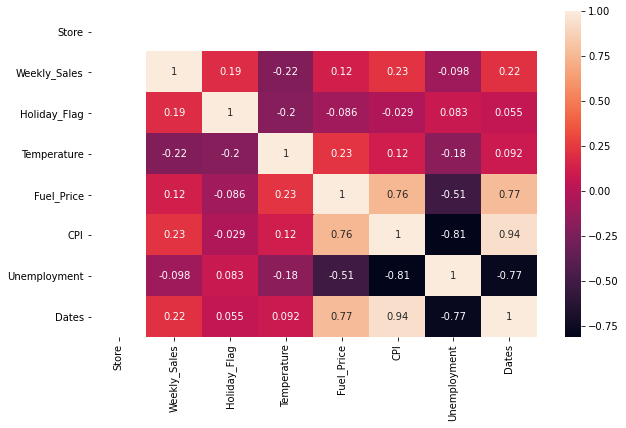

In [44]:
#Variable dependencies
plt.figure(figsize=(10,6))
sns.heatmap(s1.corr(), annot=True)
plt.show()

### Conclusion
- Fuel price and CPI have a positive correlation with the Sales
- Temperature does not have impact on sales as it has negative correlation

In [18]:
#Defining X,y along with train and test data
store1 = s1[['Dates','Weekly_Sales']]
X = s1['Dates']
y = s1['Weekly_Sales']
X = np.array(X).reshape((-1,1))
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,random_state=0)

In [19]:
#Model Building ad model score
Model = LinearRegression()
Model.fit(X_train,y_train)
pred = Model.predict(X_test)
Model.score(X_test,y_test)

0.0438129494255759

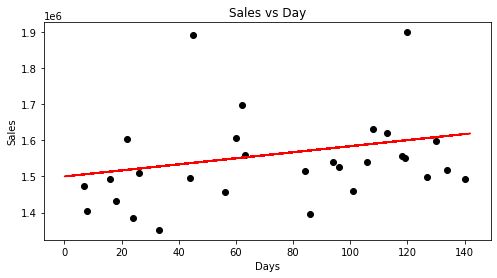

In [20]:
#Plotting the regression line
plt.figure(figsize=(8,4),linewidth=4)
plt.scatter(X_test, y_test, color='black') 
plt.plot(X_train, Model.predict(X_train), color='red')
plt.title("Sales vs Day")
plt.xlabel("Days") 
plt.ylabel("Sales") 
plt.show() 